In [7]:
import numpy as np
from scipy import spatial
import math
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn import preprocessing
import copy

In [8]:
# Opening variable files
dataMax = np.load(r"C:\Users\dema.alkashkish\OneDrive - Dasi Simulations LLC\PPMI\Data\Max_variables.npz")
dataMean = np.load(r"C:\Users\dema.alkashkish\OneDrive - Dasi Simulations LLC\PPMI\Data\Mean_variables.npz")
dataContact = np.load(r"C:\Users\dema.alkashkish\OneDrive - Dasi Simulations LLC\PPMI\Data\Contact_variables.npz")
dataOther = np.load(r"C:\Users\dema.alkashkish\OneDrive - Dasi Simulations LLC\PPMI\Data\Other_variables.npz")

In [9]:
# Function to reorder variables so they go from in order (B1 to B13)
def reorder(var):
    varReorder = copy.deepcopy(var)
    for j in range(len(var)):
        onePat = var[j] # One patient, both phases, all depths
        if j==0:
            p=0
        elif ((j==1) or (j==2) or (j==3) or (j==4)):
            p=j+7
        elif j==5:
            p=12
        elif ((j==6) or (j==7) or (j==8) or (j==9) or (j==10) or (j==11) or (j==12)):
            p=j-5
        varReorder[p] = onePat
    
    return(varReorder)
       

In [10]:
# Universal Variables
Fmag_max = dataMax['arr_0']; Fnorm_patch_max = dataMax['arr_1']; Faxial_max = dataMax['arr_2']; Fcirc_max = dataMax['arr_3']; contP_max = dataMax['arr_4'];
Fmag_mean = dataMean['arr_0']; Fnorm_patch_mean = dataMean['arr_1']; Faxial_mean = dataMean['arr_2']; Fcirc_mean = dataMean['arr_3']
ContF_Fmag = dataContact['arr_0']; ContF_Fnorm = dataContact['arr_1']; ContF_Faxial = dataContact['arr_2']; 
ContF_Fcirc = dataContact['arr_3']; contP_mean = dataContact['arr_4']; percCont_all = dataContact['arr_5']
MS_length = dataOther['arr_0']; Annulus_area = dataOther['arr_1'];  Annulus_diameter = dataOther['arr_2']; 
LVOT_area = dataOther['arr_3']; LVOT_diameter = dataOther['arr_4']; ratioD_LVOT_Annulus = dataOther['arr_5']; 
calciumVol = dataOther['arr_6']; impDepth = dataOther['arr_7']; info = dataOther['arr_8']; k_max = dataOther['arr_9'];
k_mean = dataOther['arr_10']; heartVal_type = dataOther['arr_11']; BSB_length = dataOther['arr_12']

# Re-Ordering Variables
Fmag_max = reorder(Fmag_max)
Fnorm_patch_max = reorder(Fnorm_patch_max) 
Faxial_max = reorder(Faxial_max) 
Fcirc_max = reorder(Fcirc_max)
contP_max = reorder(contP_max)
Fmag_mean = reorder(Fmag_mean) 
Fnorm_patch_mean = reorder(Fnorm_patch_mean) 
Faxial_mean = reorder(Faxial_mean) 
Fcirc_mean = reorder(Fcirc_mean)
ContF_Fmag = reorder(ContF_Fmag) 
ContF_Fnorm = reorder(ContF_Fnorm) 
ContF_Faxial = reorder(ContF_Faxial) 
ContF_Fcirc = reorder(ContF_Fcirc) 
contP_mean = reorder(contP_mean) 
percCont_all = reorder(percCont_all)
MS_length = reorder(MS_length) 
Annulus_area = reorder(Annulus_area)
Annulus_diameter = reorder(Annulus_diameter) 
LVOT_area = reorder(LVOT_area)
LVOT_diameter = reorder(LVOT_diameter) 
ratioD_LVOT_Annulus = reorder(ratioD_LVOT_Annulus) 
calciumVol = reorder(calciumVol) 
impDepth = reorder(impDepth) 
info = reorder(info) 
k_max = reorder(k_max)
k_mean = reorder(k_mean) 
heartVal_type = reorder(heartVal_type) 
BSB_length = reorder(BSB_length)

patOrder = ['B1','B2','B3','B4','B5','B6','B7','B9','B10','B11','B12','B13','B16']

In [11]:
# Function to make scatter plots
def scatterplot(var,infoVar,label,patOrder,legend):
    # Creating scatter plots
    # Diastole 
    depth = []; LegLabel = []
    for patient in infoVar[0][0]:
        dep = patient.split('_')[2]
        depth.append(dep) # depth includes all depths for both types
        # will be used for coloring circles for each x-axis
        letter = patient.split('_')[1][0]
        leg = letter + "_" + dep
        LegLabel.append(leg) 
    
    x = list(range(13))
    y1 = var[0][0] # patient 1, diastole, variable values
    y2 = var[1][0] # patient 2, diastole, variable values
    y3 = var[2][0] # patient 3, diastole, variable values
    y4 = var[3][0] # patient 4, diastole, variable values
    y5 = var[4][0] # patient 5, diastole, variable values
    y6 = var[5][0] # patient 6, diastole, variable values
    y7 = var[6][0] # patient 7, diastole, variable values
    y9 = var[7][0] # patient 9, diastole, variable values
    y10 = var[8][0] # patient 10, diastole, variable values
    y11 = var[9][0] # patient 11, diastole, variable values
    y12 = var[10][0] # patient 12, diastole, variable values
    y13 = var[11][0] # patient 13, diastole, variable values
    y16 = var[12][0] # patient 16, diastole, variable values
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(11, 4)
    for i in range(6):
        if i==0:
            color = "red"
        if i==1:
            color = "green"
        if i==2:
            color="brown"
        if i==3:
            color="blue"
        if i==4:
            color="purple"
        if i==5:
            color="grey"
        ax1.scatter(0,y1[i],c=color,label=(LegLabel[i]))
        ax1.scatter(1,y2[i],c=color)
        ax1.scatter(2,y3[i],c=color)
        ax1.scatter(3,y4[i],c=color)
        ax1.scatter(4,y5[i],c=color)
        ax1.scatter(5,y6[i],c=color)
        ax1.scatter(6,y7[i],c=color)
        ax1.scatter(7,y9[i],c=color)
        ax1.scatter(8,y10[i],c=color)
        ax1.scatter(9,y11[i],c=color)
        ax1.scatter(10,y12[i],c=color)
        ax1.scatter(11,y13[i],c=color)
        ax1.scatter(12,y16[i],c=color)

    ax1.set_xlabel("Patient")
    ax1.set_ylabel(label)
    ax1.set_title(label + " Diastole")
    ax1.set_xticks(x)
    ax1.set_xticklabels(patOrder)
    if legend==1:
        ax1.legend()

    
    #------------------------------------------------------------------------------------------------------------------------#
    # Creating scatter plots
    # Systole
    depth = []; LegLabel = []
    for patient in infoVar[0][1]:
        dep = patient.split('_')[2]
        depth.append(dep) # depth includes all depths for both types
        # will be used for coloring circles for each x-axis
        letter = patient.split('_')[1][0]
        leg = letter + "_" + dep
        LegLabel.append(leg) 
    
    x = list(range(13))
    y1 = var[0][1] # patient 1, systole, all variable values
    y2 = var[1][1] # patient 2, systole, all variable values
    y3 = var[2][1] # patient 3, systole, all variable values
    y4 = var[3][1] # patient 4, systole, all variable values
    y5 = var[4][1] # patient 5, systole, all variable values
    y6 = var[5][1] # patient 6, systole, all variable values
    y7 = var[6][1] # patient 7, systole, all variable values
    y9 = var[7][1] # patient 9, systole, all variable values
    y10 = var[8][1] # patient 10, systole, all variable values
    y11 = var[9][1] # patient 11, systole, all variable values
    y12 = var[10][1] # patient 12, systole, all variable values
    y13 = var[11][1] # patient 13, systole, all variable values
    y16 = var[12][1] # patient 16, systole, all variable values
    

    for i in range(6):
        if i==0:
            color = "red"
        if i==1:
            color = "green"
        if i==2:
            color="brown"
        if i==3:
            color="blue"
        if i==4:
            color="purple"
        if i==5:
            color="grey"
        ax2.scatter(0,y1[i],c=color,label=(LegLabel[i]))
        ax2.scatter(1,y2[i],c=color)
        ax2.scatter(2,y3[i],c=color)
        ax2.scatter(3,y4[i],c=color)
        ax2.scatter(4,y5[i],c=color)
        ax2.scatter(5,y6[i],c=color)
        ax2.scatter(6,y7[i],c=color)
        ax2.scatter(7,y9[i],c=color)
        ax2.scatter(8,y10[i],c=color)
        ax2.scatter(9,y11[i],c=color)
        ax2.scatter(10,y12[i],c=color)
        ax2.scatter(11,y13[i],c=color)
        ax2.scatter(12,y16[i],c=color)

        
    ax2.set_xlabel("Patient")
    ax2.set_ylabel(label)
    ax2.set_title(label + " Systole")
    ax2.set_xticks(x)
    ax2.set_xticklabels(patOrder)
    if legend==1:
        ax2.legend()
    
    plt.show()


In [12]:
# Function to make scatter plots for variables that depend on only the initial anatomy (same for all depths)
def scatterplotOverlap(var,infoVar,label,patOrder,legend):
    # Creating scatter plots
    # Diastole 
    depth = []
    for patient in infoVar[0][0]:
        dep = patient.split('_')[2]
        depth.append(dep) # depth includes all depths for both types
        # will be used for coloring circles for each x-axis
        letter = patient.split('_')[1][0]
    LegLabel = ['Diastole','Systole'] 
       
        
    x = list(range(13))
    y1 = var[0][0] # patient 1, diastole, variable values
    y2 = var[1][0] # patient 2, diastole, variable values
    y3 = var[2][0] # patient 3, diastole, variable values
    y4 = var[3][0] # patient 4, diastole, variable values
    y5 = var[4][0] # patient 5, diastole, variable values
    y6 = var[5][0] # patient 6, diastole, variable values
    y7 = var[6][0] # patient 7, diastole, variable values
    y9 = var[7][0] # patient 9, diastole, variable values
    y10 = var[8][0] # patient 10, diastole, variable values
    y11 = var[9][0] # patient 11, diastole, variable values
    y12 = var[10][0] # patient 12, diastole, variable values
    y13 = var[11][0] # patient 13, diastole, variable values
    y16 = var[12][0] # patient 16, diastole, variable values
    
    plt.figure(figsize=(7,5))
    plt.subplot(1,1,1)
    color = "purple"
            
    plt.scatter(0,y1[0],c=color,label=(LegLabel[0]))
    plt.scatter(1,y2[0],c=color)
    plt.scatter(2,y3[0],c=color)
    plt.scatter(3,y4[0],c=color)
    plt.scatter(4,y5[0],c=color)
    plt.scatter(5,y6[0],c=color)
    plt.scatter(6,y7[0],c=color)
    plt.scatter(7,y9[0],c=color)
    plt.scatter(8,y10[0],c=color)
    plt.scatter(9,y11[0],c=color)
    plt.scatter(10,y12[0],c=color)
    plt.scatter(11,y13[0],c=color)
    plt.scatter(12,y16[0],c=color)

        
    #------------------------------------------------------------------------------------------------------------------------#
    # Creating scatter plots
    # Systole
    depth = []
    for patient in infoVar[0][1]:
        dep = patient.split('_')[2]
        depth.append(dep) # depth includes all depths for both types
        # will be used for coloring circles for each x-axis
        letter = patient.split('_')[1][0]

    
    x = list(range(13))
    y1 = var[0][1] # patient 1, systole, all variable values
    y2 = var[1][1] # patient 2, systole, all variable values
    y3 = var[2][1] # patient 3, systole, all variable values
    y4 = var[3][1] # patient 4, systole, all variable values
    y5 = var[4][1] # patient 5, systole, all variable values
    y6 = var[5][1] # patient 6, systole, all variable values
    y7 = var[6][1] # patient 7, systole, all variable values
    y9 = var[7][1] # patient 9, systole, all variable values
    y10 = var[8][1] # patient 10, systole, all variable values
    y11 = var[9][1] # patient 11, systole, all variable values
    y12 = var[10][1] # patient 12, systole, all variable values
    y13 = var[11][1] # patient 13, systole, all variable values
    y16 = var[12][1] # patient 16, systole, all variable values
    
    
    plt.subplot(1,1,1)
    color = "red"
    
    plt.scatter(0,y1[0],c=color,label=(LegLabel[1]))
    plt.scatter(1,y2[0],c=color)
    plt.scatter(2,y3[0],c=color)
    plt.scatter(3,y4[0],c=color)
    plt.scatter(4,y5[0],c=color)
    plt.scatter(5,y6[0],c=color)
    plt.scatter(6,y7[0],c=color)
    plt.scatter(7,y9[0],c=color)
    plt.scatter(8,y10[0],c=color)
    plt.scatter(9,y11[0],c=color)
    plt.scatter(10,y12[0],c=color)
    plt.scatter(11,y13[0],c=color)
    plt.scatter(12,y16[0],c=color)

    plt.xlabel("Patient")
    plt.ylabel(label)
    plt.title(label)
    plt.subplot(1,1,1).set_xticks(x)
    plt.subplot(1,1,1).set_xticklabels(patOrder)
    if legend==1:
        plt.legend()
    plt.show()


In [13]:
# Colormesh
def ColormeshPlot(dataSpecific, PatIDList, data, phase, depth, varNames, infoVar, patOrder):
    
    x = np.arange(0, len(data), 1)
    y = np.arange(0, len(PatIDList), 1)
    x, y = np.meshgrid(x, y)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    
    plt.pcolormesh(dataSpecific)
    plt.xlabel("Patient")
    plt.ylabel("Variables")
    title = 'Colormesh for ' + phase + ' (Depth: ' + str(depth) + ')'
    plt.title(title)
    plt.xticks(np.arange(1, len(PatIDList)+1, 1.0))
    plt.yticks(np.arange(1, len(data)+1, 1.0))

    ax.set_xticklabels(patOrder)
    ax.set_yticklabels(varNames)
    
    plt.colorbar()
    plt.show()
    

In [14]:
def normalizeList(num_of_pat, num_phases, var):
    varMax = 0;
    varMin = 0;
    varNormalized = copy.deepcopy(var)
    for i in range(num_of_pat):
        for j in range(num_phases):
            arr = var[i][j]
            maxArr = max(arr)
            minArr = min(arr)
            if maxArr > varMax:
                varMax = maxArr
            if minArr < varMin:
                varMin = minArr
    
    for i in range(num_of_pat):
        for j in range(num_phases):
            arr = var[i][j]
            for k in range(len(arr)):
                x = (arr[k] - varMin)/(varMax - varMin)
                varNormalized[i][j][k] = x
                
    return(varNormalized)
            

In [15]:
# Returns lists of the variable for each depth in order 1-16 with both phases (B1d, B1s, B2d, B2s....)
def separatebyDepth(var, vartype):
    var25e = np.array([]) 
    var5e = np.array([]) 
    var0e = np.array([])
    var2s = np.array([])
    var4s = np.array([])
    var0s = np.array([])
    for i in range(len(var)): # pat number
        for j in range(2): # phase
            allDep = var[i][j]
           
            var25e = np.append(var25e, allDep[0]) #-2.50
            var5e = np.append(var5e, allDep[1]) #-5.00
            var0e = np.append(var0e, allDep[2]) #0.00
            var2s = np.append(var2s, allDep[3]) #-2.00
            var4s = np.append(var4s, allDep[4]) #-4.00
            var0s = np.append(var0s, allDep[5]) #0.00
                
    return(var25e, var5e, var0e, var2s, var4s, var0s)

In [16]:
# Returns lists of the variable for each depth and phase in order 1-16 (B1d, B2d, B3d ....)
def separatebyDepthPhase_Diastole(var, vartype):
    var25e_d = np.array([]) 
    var5e_d = np.array([]) 
    var0e_d = np.array([])
    var2s_d = np.array([])
    var4s_d = np.array([])
    var0s_d = np.array([])
    for i in range(len(var)): # pat number
        j = 0; # Diastole
        allDep = var[i][j]

        var25e_d = np.append(var25e_d, allDep[0]) #-2.50
        var5e_d = np.append(var5e_d, allDep[1]) #-5.00
        var0e_d = np.append(var0e_d, allDep[2]) #0.00
        var2s_d = np.append(var2s_d, allDep[3]) #-2.00
        var4s_d = np.append(var4s_d, allDep[4]) #-4.00
        var0s_d = np.append(var0s_d, allDep[5]) #0.00
                
    return(var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d)

In [17]:
# Returns lists of the variable for each depth and phase in order 1-16 (B1s, B2s, B3s ....)
def separatebyDepthPhase_Systole(var, vartype):
    var25e_s = np.array([]) 
    var5e_s = np.array([]) 
    var0e_s = np.array([])
    var2s_s = np.array([])
    var4s_s = np.array([])
    var0s_s = np.array([])
    for i in range(len(var)): # pat number
        j = 1; # Systole
        allDep = var[i][j]

        var25e_s = np.append(var25e_s, allDep[0]) #-2.50
        var5e_s = np.append(var5e_s, allDep[1]) #-5.00
        var0e_s = np.append(var0e_s, allDep[2]) #0.00
        var2s_s = np.append(var2s_s, allDep[3]) #-2.00
        var4s_s = np.append(var4s_s, allDep[4]) #-4.00
        var0s_s = np.append(var0s_s, allDep[5]) #0.00
                
    return(var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s)

In [18]:
def boxPlot(dataS, dataD, depth, variable):
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(10, 4)
    
    x = np.array([range(6)])
    # Creating plot
    edge_color = "C0"
    fill_color = 'C0'
    bpS = ax1.boxplot(dataS,patch_artist=True,boxprops=dict(facecolor="C0"))        
    bpD = ax2.boxplot(dataD,patch_artist=True,boxprops=dict(facecolor="C2"))  
    
    # show plot Systole
    ax1.set_xlabel("Depth")
    yLab = variable + " Boxplot"
    ax1.set_ylabel(yLab)
    title = 'Boxplot for ' + variable + ' (Systole)'
    ax1.set_title(title)
    ax1.set_xticklabels(depth)
    
    # show plot Diastole
    ax2.set_xlabel("Depth")
    ax2.set_ylabel(variable)
    title = 'Boxplot for ' + variable + ' (Diastole)'
    ax2.set_title(title)
    ax2.set_xticklabels(depth)

    plt.show()
    

In [19]:
def boxPlotCombined(dataS, dataD, depth, variable):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 4)
    
    # Creating plot
    edge_color = "C0"
    fill_color = 'C0'
    data = [dataS[0],dataD[0]]
    bp = ax.boxplot(data,patch_artist=True,boxprops=dict(facecolor="C0"))        
    
    # show plot Systole
    ax.set_xlabel("Phase")
    yLab = variable + " Boxplot"
    ax.set_ylabel(yLab)
    title = 'Boxplot for ' + variable 
    ax.set_title(title)
    ax.set_xticklabels(['Systole','Diastole'])

    plt.show()
    

In [20]:
depth=[] # list of depth order
for patient in info[0][1]:
    dep = patient.split('_')[2]
    depth.append(dep) # depth includes all depths for both types

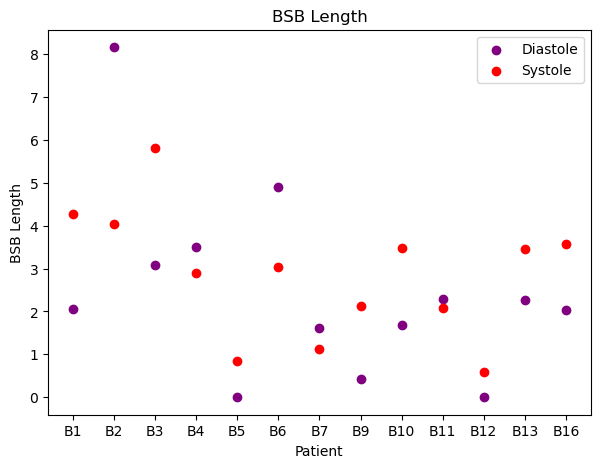

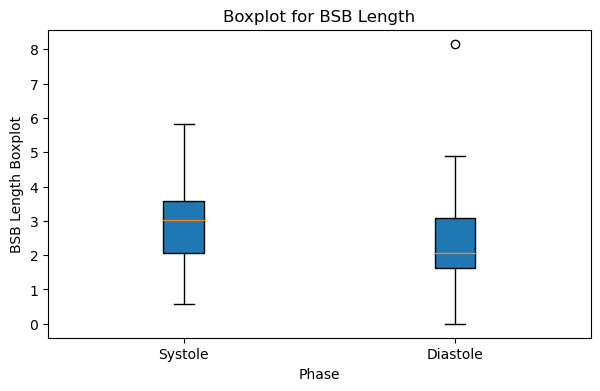

In [21]:
# BSB LENGTH Scatterplot
scatterplotOverlap(BSB_length,info,"BSB Length",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(BSB_length, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(BSB_length, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlotCombined(dataS, dataD, depth, "BSB Length")


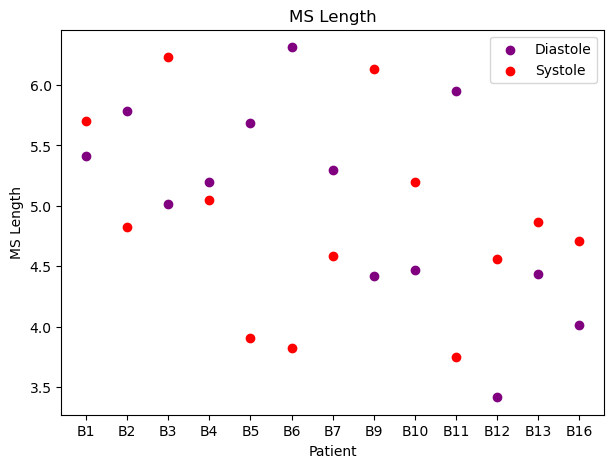

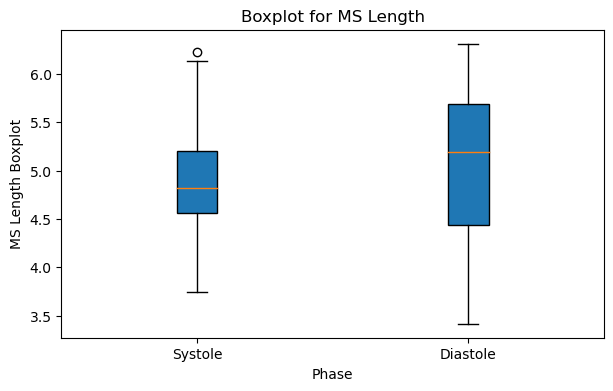

In [22]:
# MS LENGTH
scatterplotOverlap(MS_length,info,"MS Length",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(MS_length, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(MS_length, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlotCombined(dataS, dataD, depth, "MS Length")

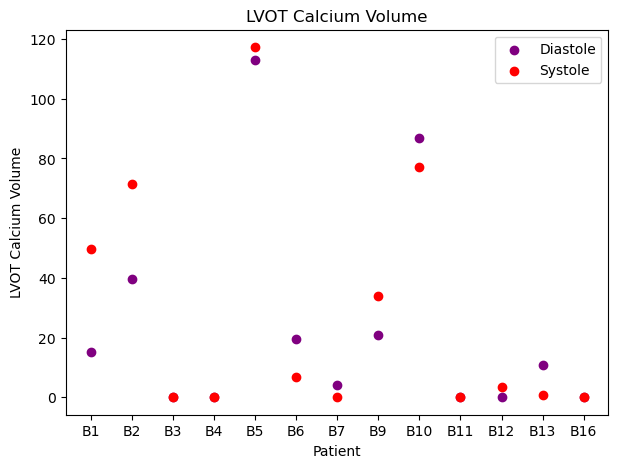

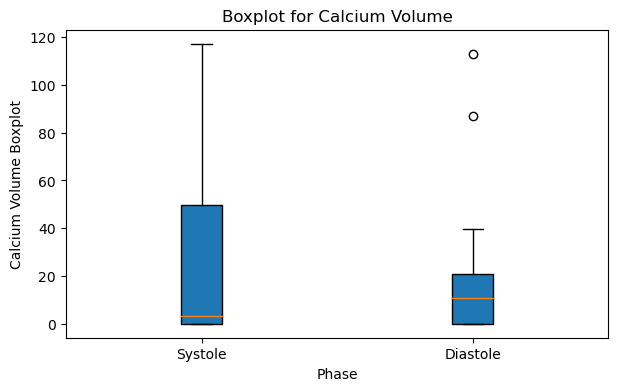

In [23]:
# calciumVol
scatterplotOverlap(calciumVol,info,"LVOT Calcium Volume",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(calciumVol, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(calciumVol, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlotCombined(dataS, dataD, depth, "Calcium Volume")

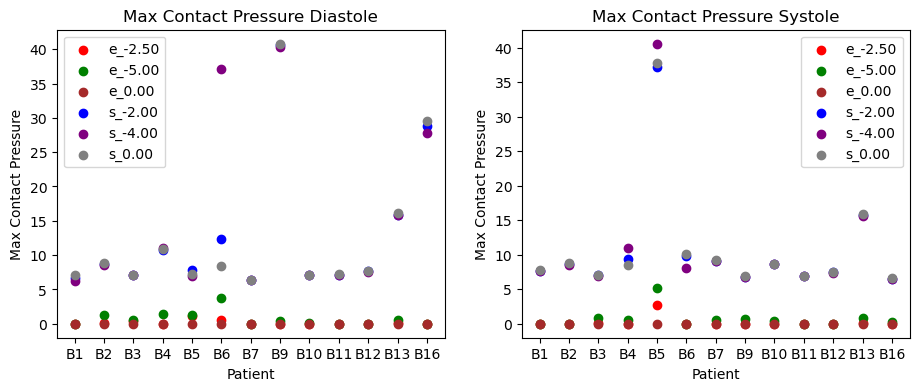

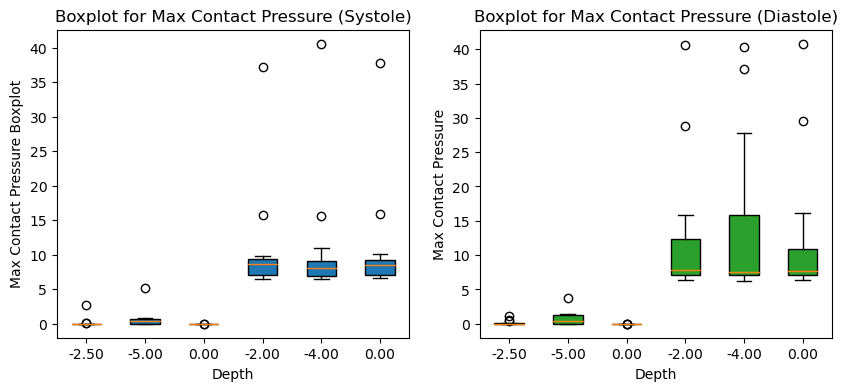

In [24]:
# contP_max
scatterplot(contP_max,info,"Max Contact Pressure",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(contP_max, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(contP_max, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Max Contact Pressure")

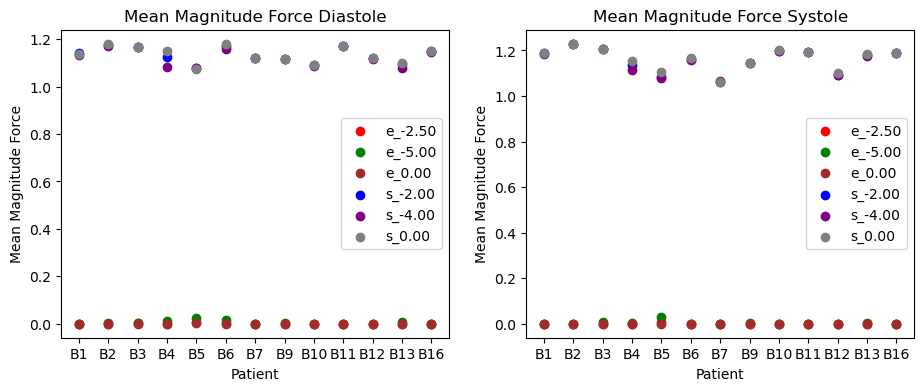

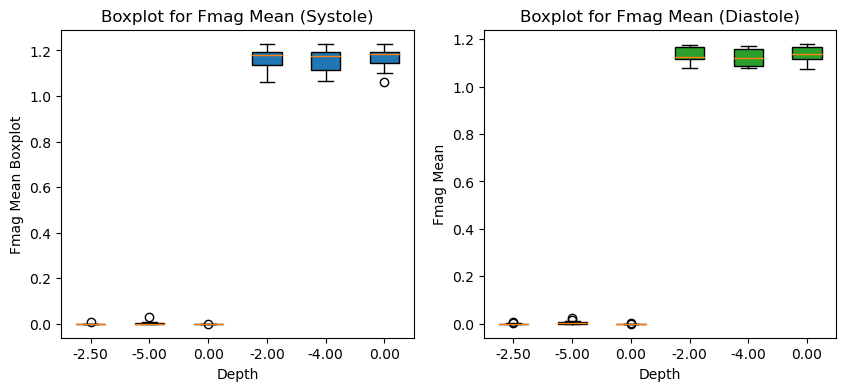

In [25]:
# Fmag_mean
scatterplot(Fmag_mean,info,"Mean Magnitude Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(Fmag_mean, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(Fmag_mean, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Fmag Mean")

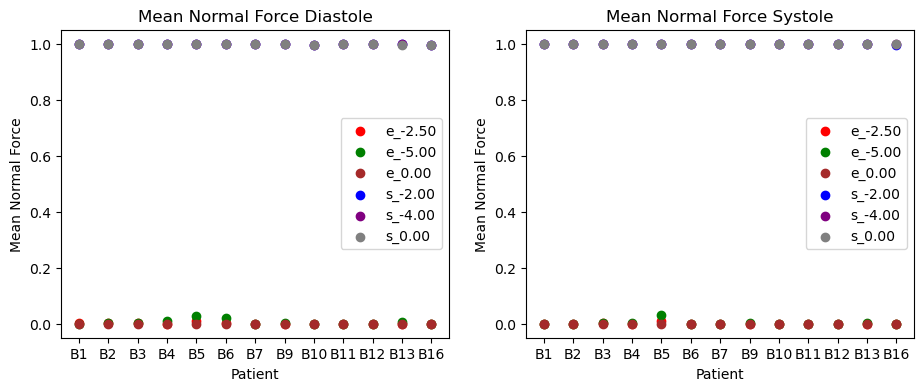

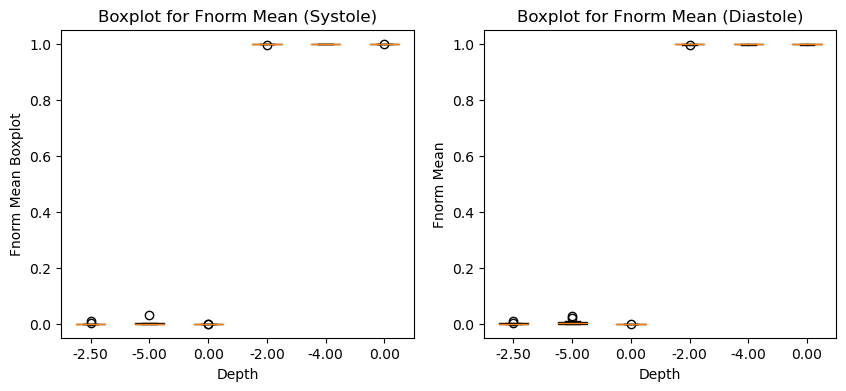

In [26]:
# Fnorm_patch_mean
scatterplot(Fnorm_patch_mean,info,"Mean Normal Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(Fnorm_patch_mean, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(Fnorm_patch_mean, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Fnorm Mean")

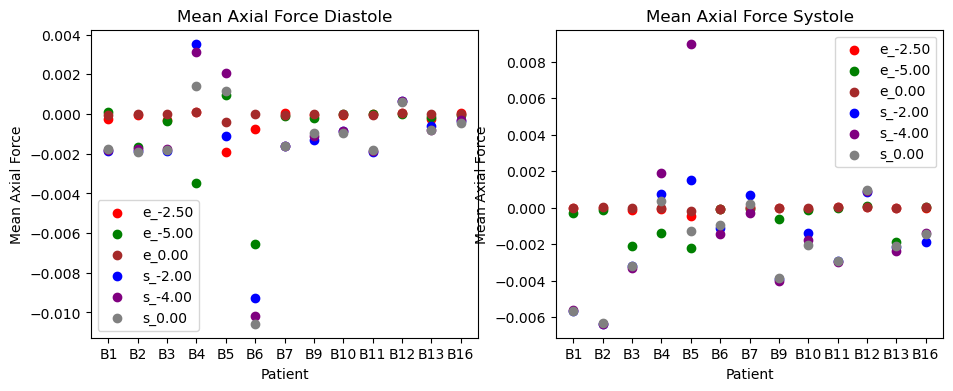

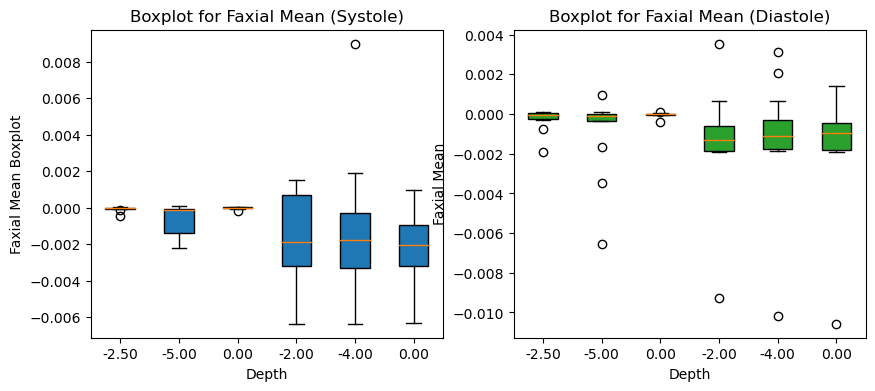

In [27]:
# Faxial_mean
scatterplot(Faxial_mean,info,"Mean Axial Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(Faxial_mean, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(Faxial_mean, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Faxial Mean")

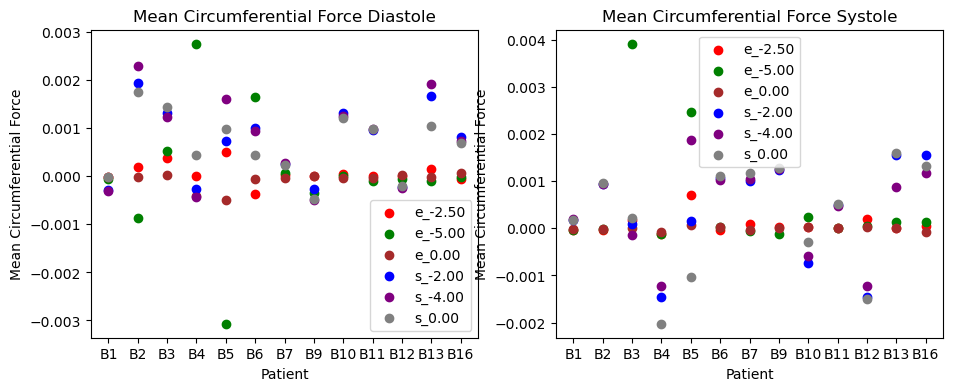

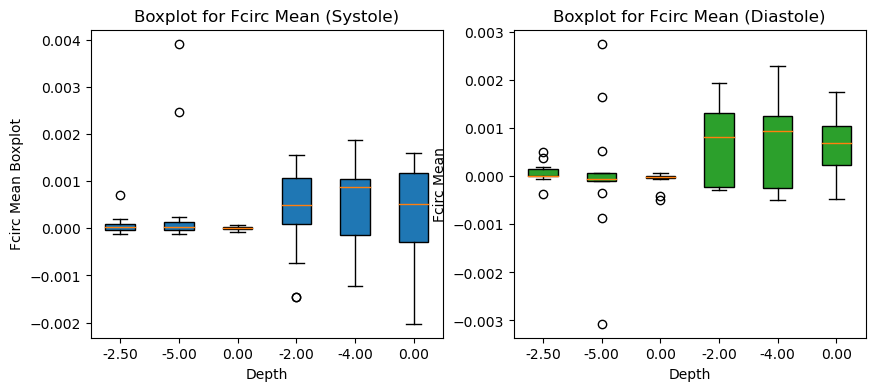

In [28]:
# Fcirc_mean
scatterplot(Fcirc_mean,info,"Mean Circumferential Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(Fcirc_mean, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(Fcirc_mean, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Fcirc Mean")

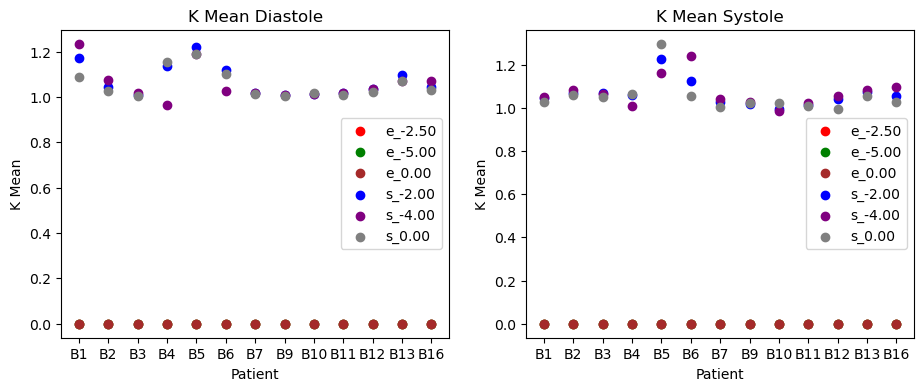

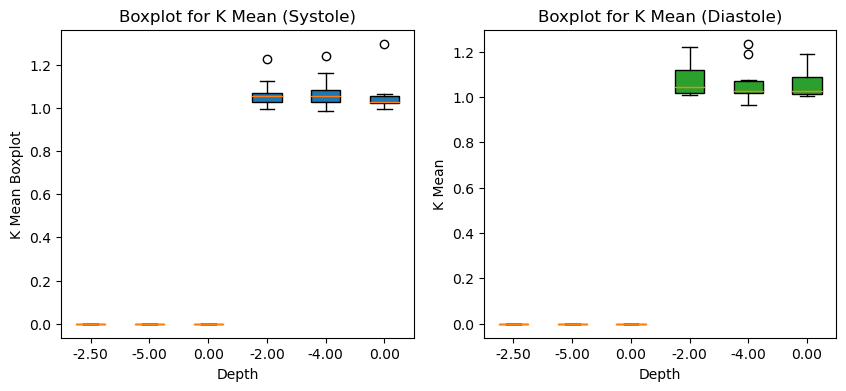

In [29]:
# K Mean
scatterplot(k_mean,info,"K Mean",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(k_mean, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(k_mean, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "K Mean")

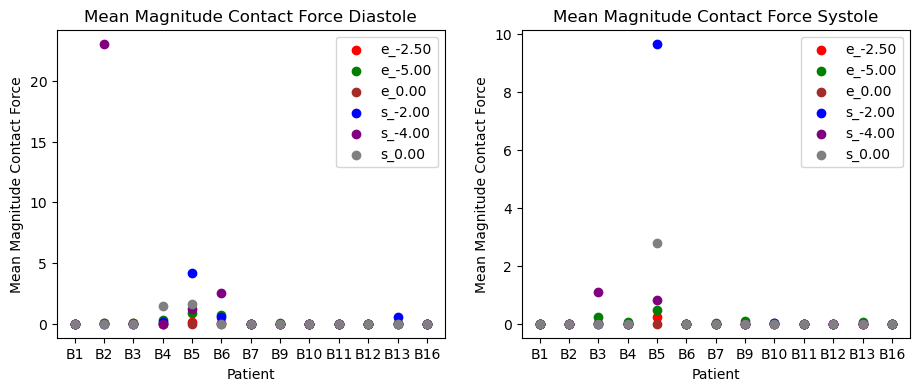

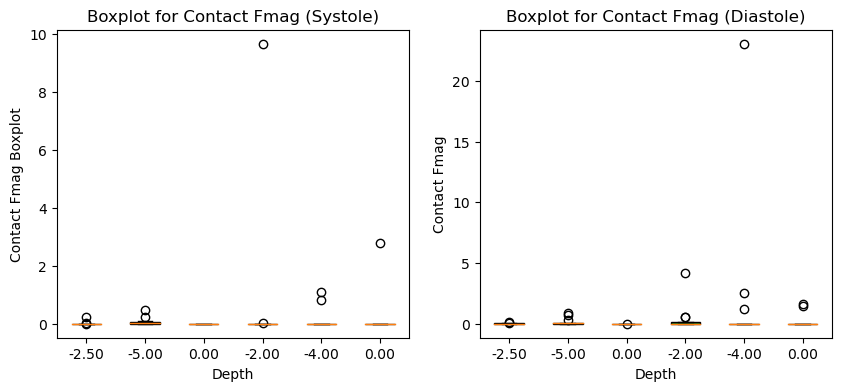

In [30]:
# ContF_Fmag
scatterplot(ContF_Fmag,info,"Mean Magnitude Contact Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(ContF_Fmag, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(ContF_Fmag, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Contact Fmag")

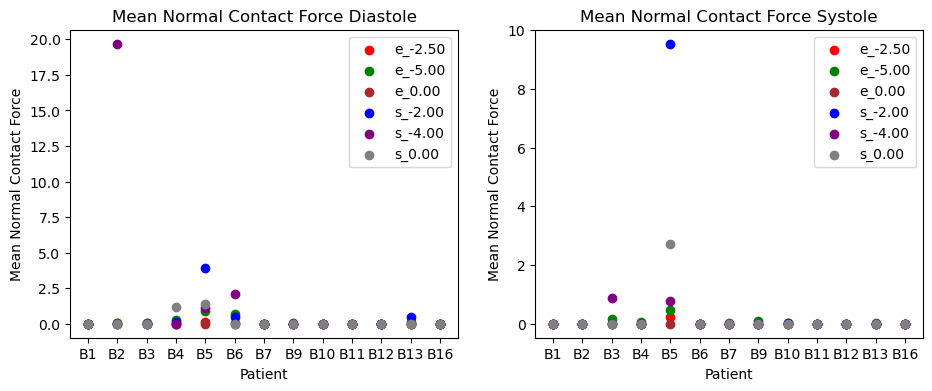

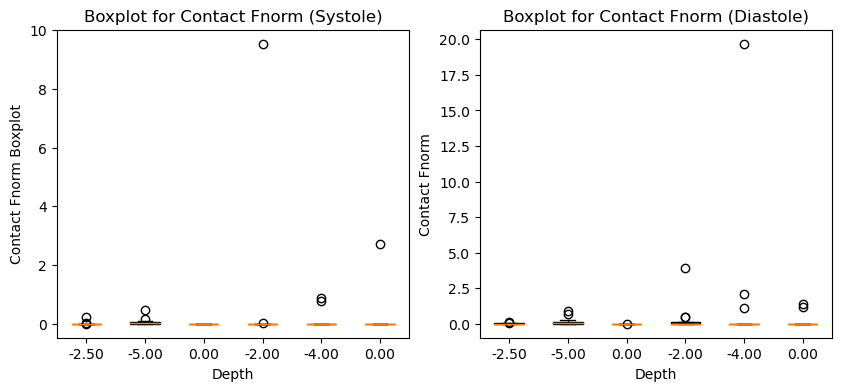

In [31]:
# ContF_Fnorm
scatterplot(ContF_Fnorm,info,"Mean Normal Contact Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(ContF_Fnorm, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(ContF_Fnorm, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Contact Fnorm")

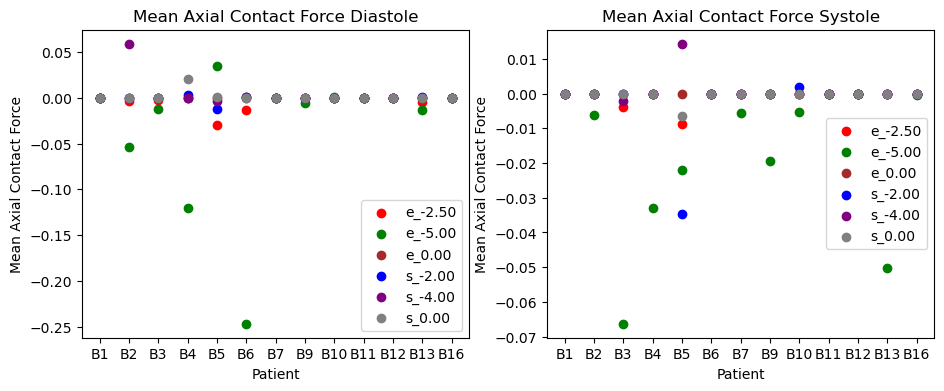

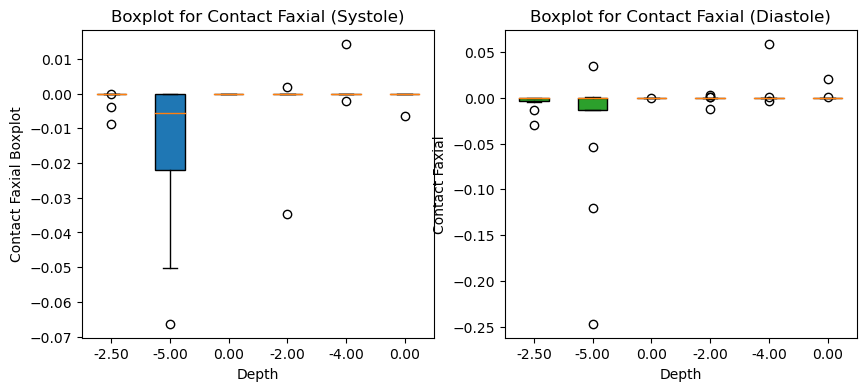

In [32]:
# ContF_Faxial
scatterplot(ContF_Faxial,info,"Mean Axial Contact Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(ContF_Faxial, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(ContF_Faxial, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Contact Faxial")

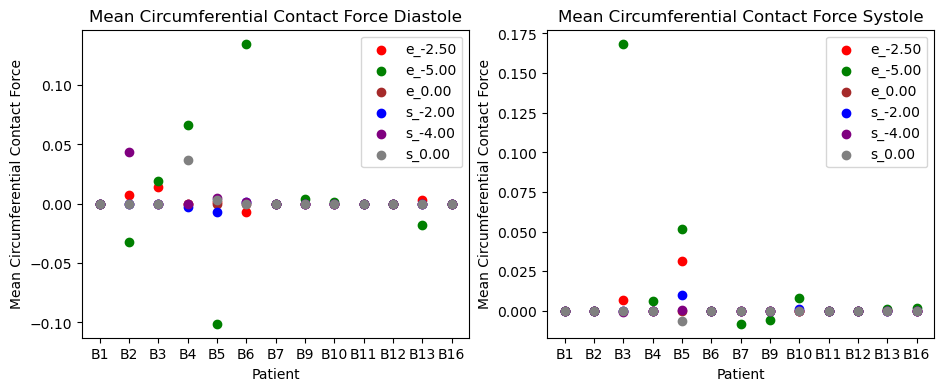

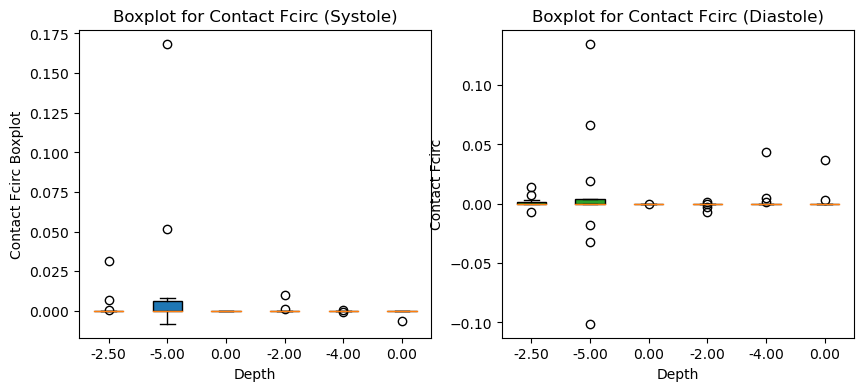

In [33]:
# ContF_Fcirc
scatterplot(ContF_Fcirc,info,"Mean Circumferential Contact Force",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(ContF_Fcirc, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(ContF_Fcirc, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Contact Fcirc")

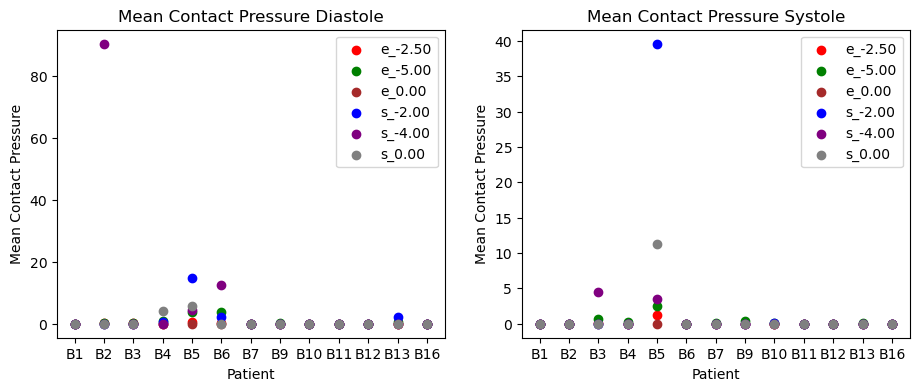

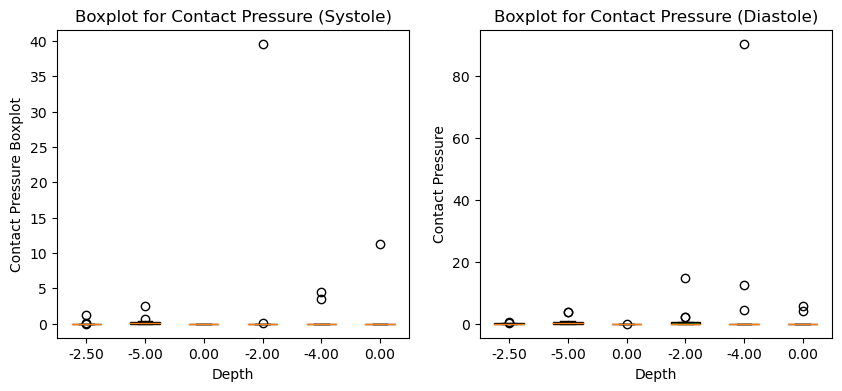

In [34]:
# contP_mean
scatterplot(contP_mean,info,"Mean Contact Pressure",patOrder,1)

# Creating dataset Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(contP_mean, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(contP_mean, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Contact Pressure")

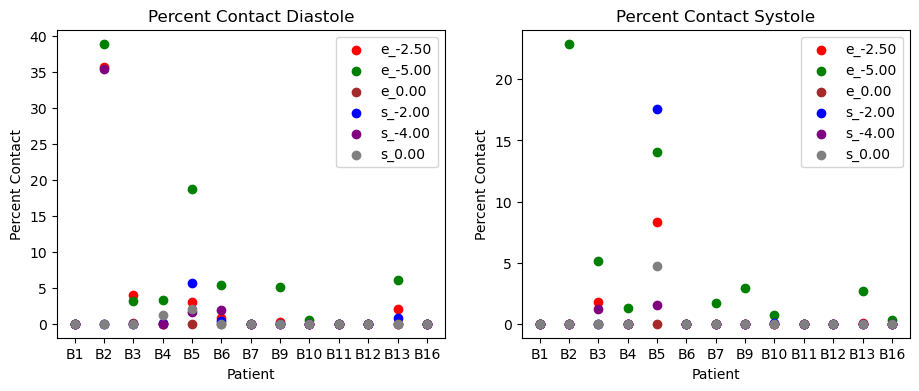

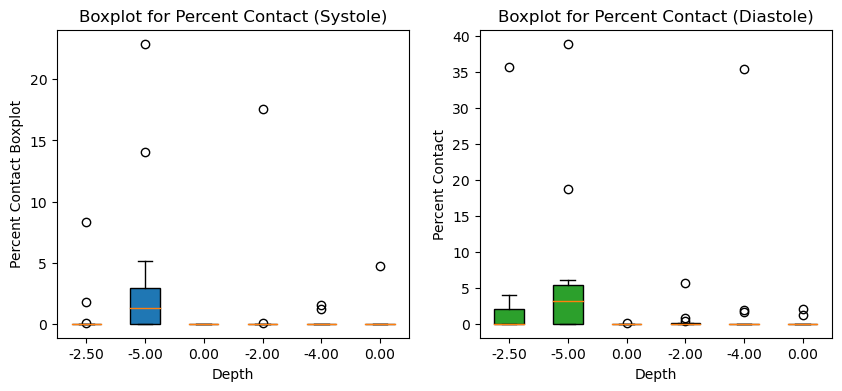

In [35]:
# percCont_all
scatterplot(percCont_all,info,"Percent Contact",patOrder,1)

# Creating Boxplot
var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d = separatebyDepthPhase_Diastole(percCont_all, int)
var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s = separatebyDepthPhase_Systole(percCont_all, int)
dataD = [var25e_d, var5e_d, var0e_d, var2s_d, var4s_d, var0s_d]
dataS = [var25e_s, var5e_s, var0e_s, var2s_s, var4s_s, var0s_s]
boxPlot(dataS, dataD, depth, "Percent Contact")


In [36]:
# Normalizing all variables
Fmag_maxNorm = normalizeList(13, 2, Fmag_max)
Fnorm_maxNorm = normalizeList(13, 2, Fnorm_patch_max)
Faxial_maxNorm = normalizeList(13, 2, Faxial_max)
Fcirc_maxNorm = normalizeList(13, 2, Fcirc_max)
contP_maxNorm = normalizeList(13, 2, contP_max)
Fmag_meanNorm = normalizeList(13, 2, Fmag_mean)
Fnorm_meanNorm = normalizeList(13, 2, Fnorm_patch_mean)
Faxial_meanNorm = normalizeList(13, 2, Faxial_mean)
Fcirc_meanNorm = normalizeList(13, 2, Fcirc_mean)
ContF_FmagNorm = normalizeList(13, 2, ContF_Fmag)
ContF_FnormNorm = normalizeList(13, 2, ContF_Fnorm)
ContF_FaxialNorm = normalizeList(13, 2, ContF_Faxial)
ContF_FcircNorm = normalizeList(13, 2, ContF_Fcirc)
contP_meanNorm = normalizeList(13, 2, contP_mean)
percCont_allNorm = normalizeList(13, 2, percCont_all)
MS_lengthNorm = normalizeList(13, 2, MS_length)
Annulus_areaNorm = normalizeList(13, 2, Annulus_area)
Annulus_diameterNorm = normalizeList(13, 2, Annulus_diameter)
LVOT_areaNorm = normalizeList(13, 2, LVOT_area)
LVOT_diameterNorm = normalizeList(13, 2, LVOT_diameter)
ratioD_LVOT_AnnulusNorm = normalizeList(13, 2, ratioD_LVOT_Annulus)
calciumVolNorm = normalizeList(13, 2, calciumVol)
BSB_lengthNorm = normalizeList(13, 2, BSB_length)


In [37]:
# Colormesh

# Defining x and y for colormesh
data = [Fmag_maxNorm, Fnorm_maxNorm, Faxial_maxNorm, Fcirc_maxNorm, contP_maxNorm, Fmag_meanNorm,Fnorm_meanNorm, 
        Faxial_meanNorm, Fcirc_meanNorm, ContF_FmagNorm, ContF_FnormNorm, ContF_FaxialNorm, ContF_FcircNorm, 
        contP_meanNorm, percCont_allNorm, MS_lengthNorm, Annulus_areaNorm, Annulus_diameterNorm, 
        LVOT_areaNorm, LVOT_diameterNorm, ratioD_LVOT_AnnulusNorm, calciumVolNorm, BSB_lengthNorm]
varNames = ['Fmag Max', 'Fnorm Max', 'Faxial Max', 'Fcirc Max', 'Cont Pressure Max', 'Fmag Mean', 'Fnorm Mean', 'Faxial Mean', 
            'Fcirc Mean', 'Cont Fmag', 'Cont Fnorm', 'Cont Faxial', 'Cont Fcirc', 'Cont Pressure', 'Percent Contact', 
            'MS Length','Annulus Area', 'Annulus Diameter', 'LVOT Area', 'LVOT Diameter', 'LVOT/Annulus Diameter', 
            'Calc Vol', 'BSB Length']


d_0 = np.zeros([len(data),len(patOrder)]); d_1 = np.zeros([len(data),len(patOrder)]);
d_2 = np.zeros([len(data),len(patOrder)]); d_3 = np.zeros([len(data),len(patOrder)]);
d_4 = np.zeros([len(data),len(patOrder)]); d_5 = np.zeros([len(data),len(patOrder)])
s_0 = np.zeros([len(data),len(patOrder)]); s_1 = np.zeros([len(data),len(patOrder)]);
s_2 = np.zeros([len(data),len(patOrder)]); s_3 = np.zeros([len(data),len(patOrder)]);
s_4 = np.zeros([len(data),len(patOrder)]); s_5 = np.zeros([len(data),len(patOrder)])

for i in range(len(data)):
    var = data[i] # single variable
    for j in range(len(var)):
        onePatAllDiastole = var[j][0] # one patient in diastole, all depths
        onePatAllSystole = var[j][1] # one patient in diastole, all depths
        d_0[i,j] = onePatAllDiastole[0] # first depth
        d_1[i,j] = onePatAllDiastole[1]
        d_2[i,j] = onePatAllDiastole[2]
        d_3[i,j] = onePatAllDiastole[3]
        d_4[i,j] = onePatAllDiastole[4]
        d_5[i,j] = onePatAllDiastole[5]
        s_0[i,j] = onePatAllSystole[0] # first depth
        s_1[i,j] = onePatAllSystole[1]
        s_2[i,j] = onePatAllSystole[2]
        s_3[i,j] = onePatAllSystole[3]
        s_4[i,j] = onePatAllSystole[4]
        s_5[i,j] = onePatAllSystole[5]


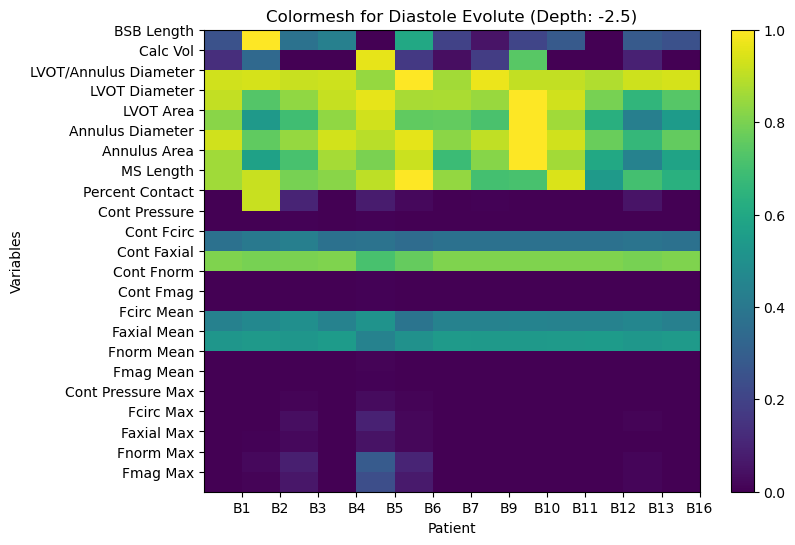

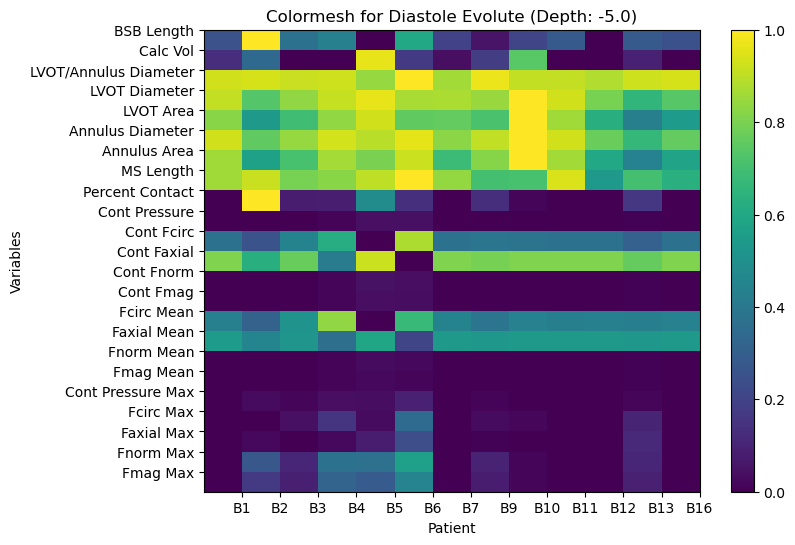

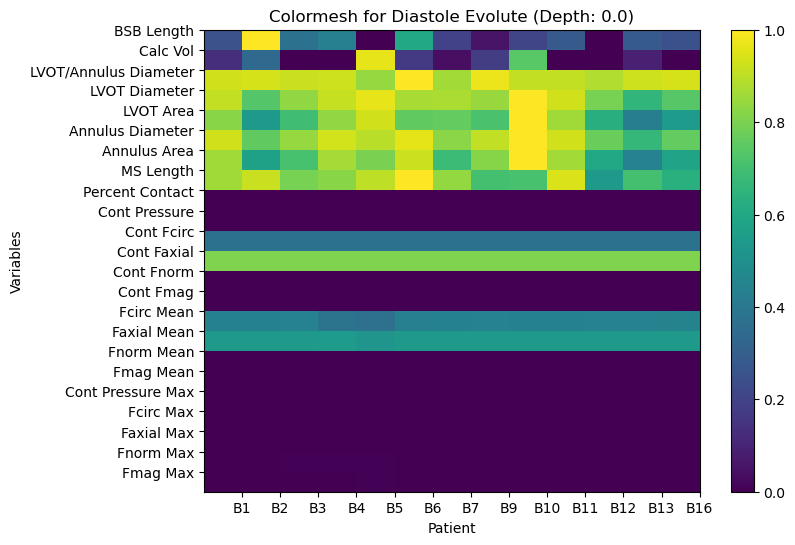

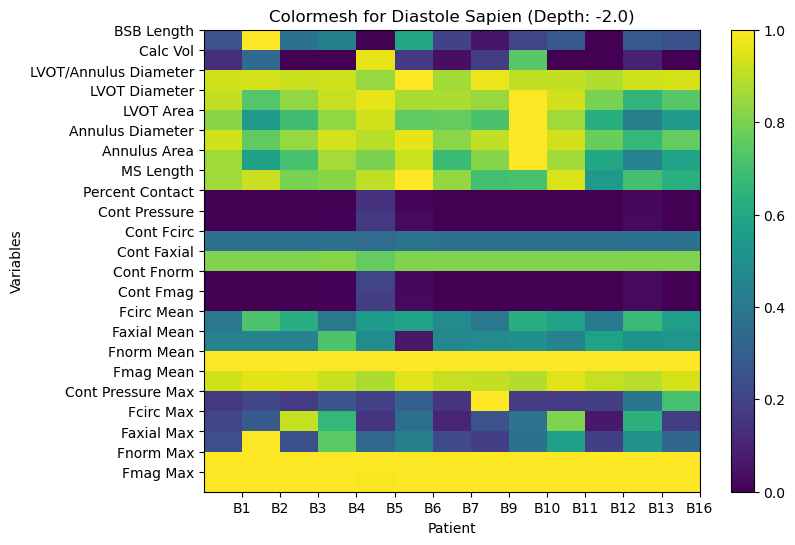

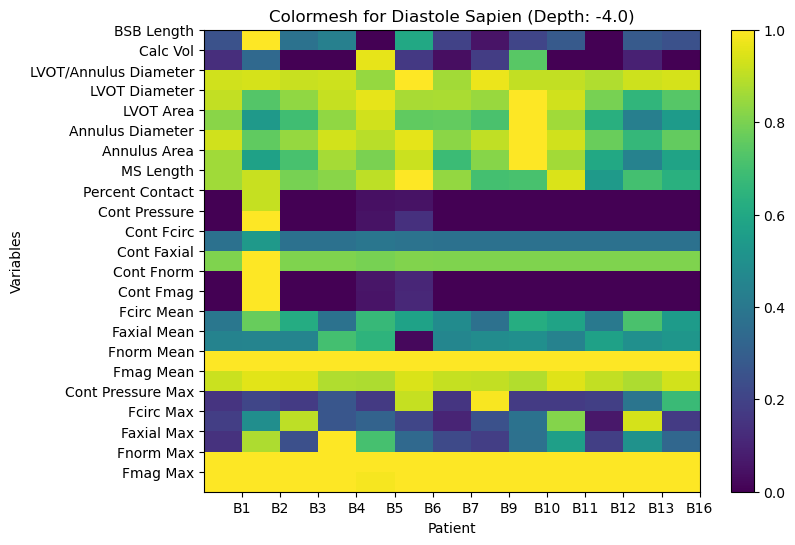

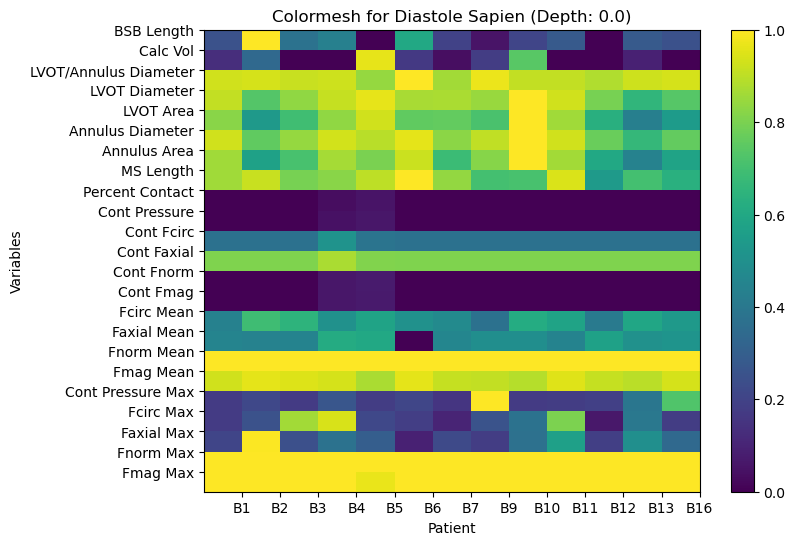

In [38]:
# Depth -2.50, phase Diastole
ColormeshPlot(d_0, patOrder, data, "Diastole Evolute", -2.50, varNames, info, patOrder)
        
# Depth -5.00, phase Diastole
ColormeshPlot(d_1, patOrder, data, "Diastole Evolute", -5.00, varNames, info, patOrder)

# Depth 0.00, phase Diastole
ColormeshPlot(d_2, patOrder, data, "Diastole Evolute", 0.00, varNames, info, patOrder)

# Depth -2.00, phase Diastole
ColormeshPlot(d_3, patOrder, data, "Diastole Sapien", -2.00, varNames, info, patOrder)

# Depth -4.00, phase Diastole
ColormeshPlot(d_4, patOrder, data, "Diastole Sapien", -4.00, varNames, info, patOrder)

# Depth 0.00, phase Diastole
ColormeshPlot(d_5, patOrder, data, "Diastole Sapien", 0.00, varNames, info, patOrder)

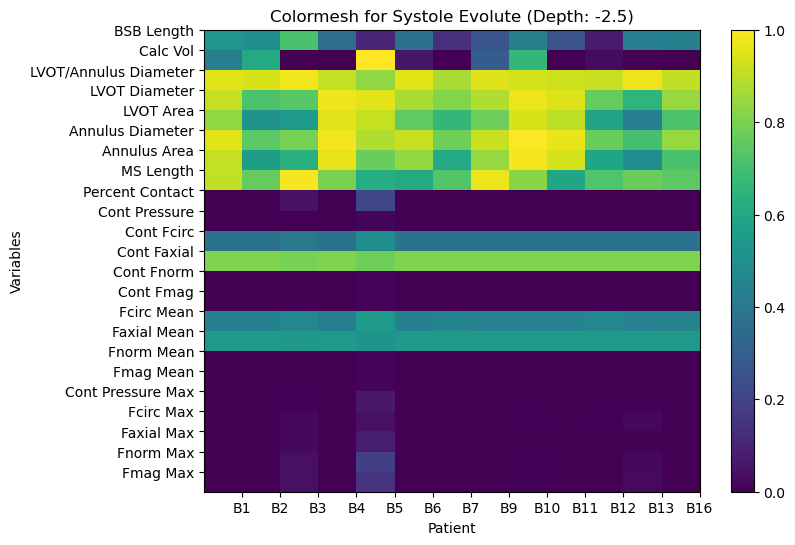

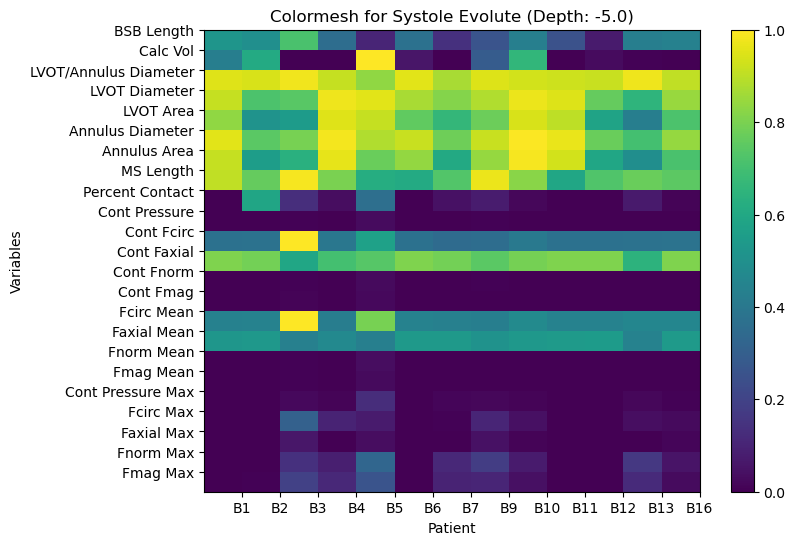

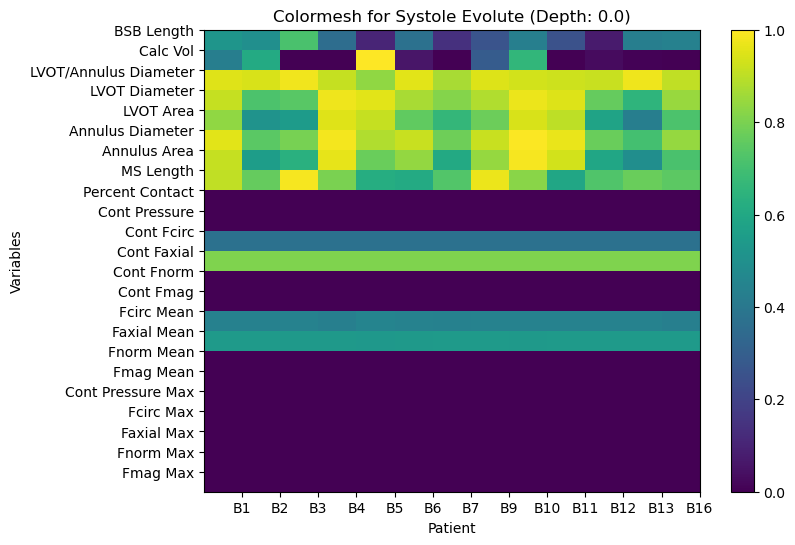

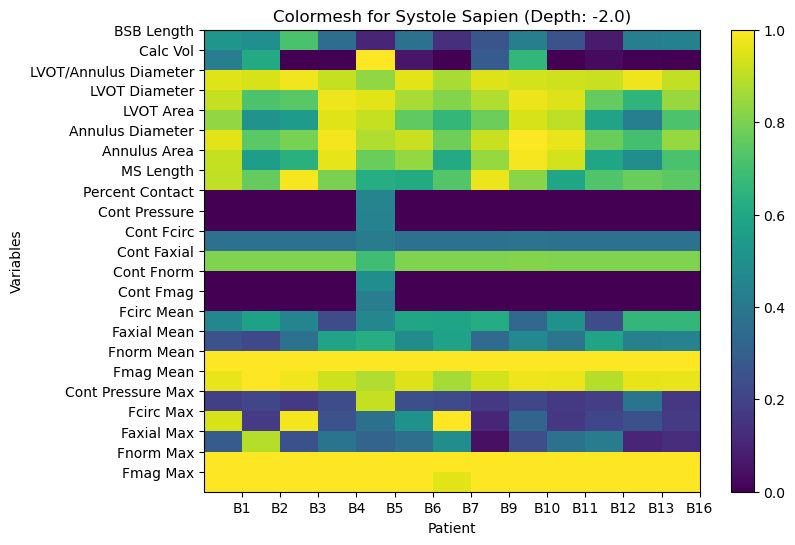

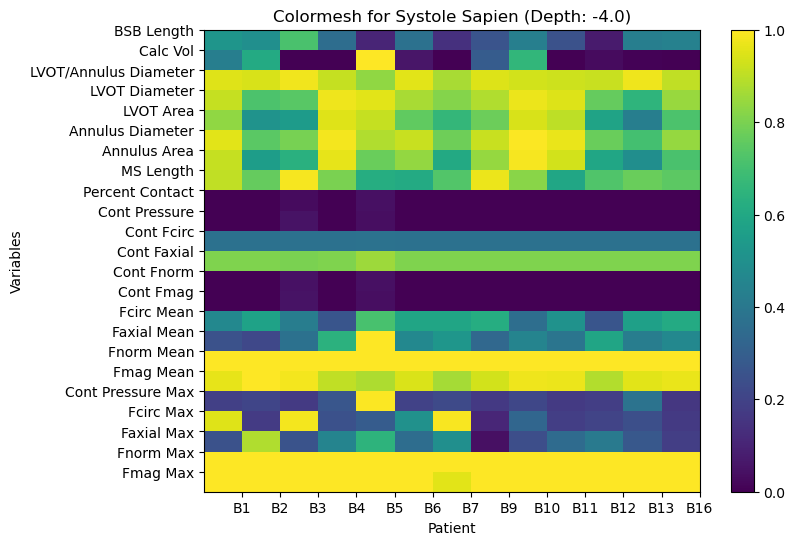

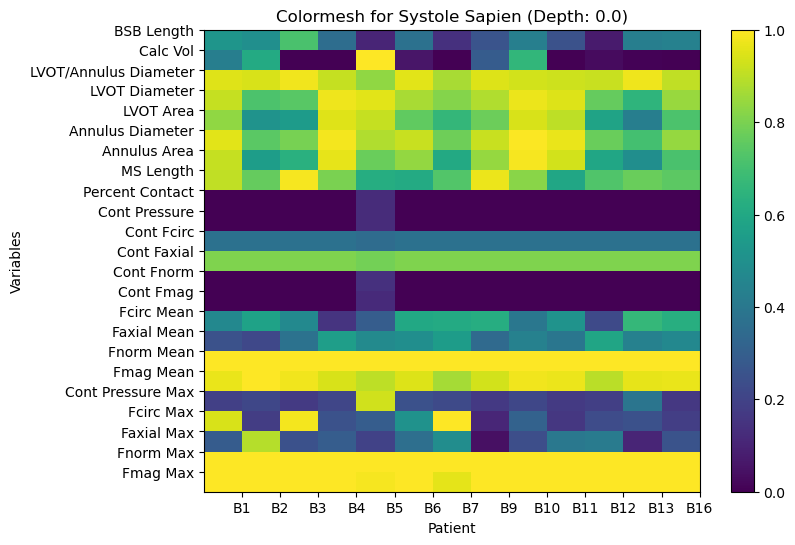

In [39]:
# Depth -2.50, phase Systole
ColormeshPlot(s_0, patOrder, data, "Systole Evolute", -2.50, varNames, info, patOrder)
        
# Depth -5.00, phase Systole
ColormeshPlot(s_1, patOrder, data, "Systole Evolute", -5.00, varNames, info, patOrder)

# Depth 0.00, phase Systole
ColormeshPlot(s_2, patOrder, data, "Systole Evolute", 0.00, varNames, info, patOrder)

# Depth -2.00, phase Systole
ColormeshPlot(s_3, patOrder, data, "Systole Sapien", -2.00, varNames, info, patOrder)

# Depth -4.00, phase Systole
ColormeshPlot(s_4, patOrder, data, "Systole Sapien", -4.00, varNames, info, patOrder)

# Depth 0.00, phase Systole
ColormeshPlot(s_5, patOrder, data, "Systole Sapien", 0.00, varNames, info, patOrder)